Authors:
 - Fryderyk Róg 50122455
 - Katharina Mai 50101746
 - Arthur Lebeurrier 50181063

The package we used for the task is called "Pytorch" one can simply install it using 
```
pip install pytorch
```

In [46]:
import torch
import torch.nn as nn
import torch.optim as optim
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(MLP, self).__init__()
        self.hidden = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU() #ReLu seems like a logical choice since input values are either 0 or 1.
        self.output = nn.Linear(hidden_size, output_size) #output size is essentially the same as input in this task
        self.sigmoid = nn.Sigmoid()# we chose sigmoid, because it will yield a 0-1 value for each of N values,
                                    # giving the most probable one, a value closer to 1

    def forward(self, x): #here we also stack layers.
        out = self.hidden(x) 
        out = self.relu(out)
        out = self.output(out)
        out = self.sigmoid(out)
        return out
    
    def predict(self, x):
        max_value = torch.max(x)
        max_indices = (x == max_value)
        y = torch.zeros_like(x)
        y[max_indices] = 1
        return y

def train(model, inputs, targets, num_epochs, learning_rate):
    criterion = nn.MSELoss()
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)

    losses = []
    for epoch in range(num_epochs):
        outputs = model(inputs) #forward step
        loss = criterion(outputs, targets) # loss calculation

        optimizer.zero_grad() # reseting gradients so they don't accumulate
        loss.backward() #backward error propagation
        optimizer.step()
        losses.append(loss.item())
        if (epoch+1) % 100 == 0:
            print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

    return model, losses

In [47]:
# Define the input and target tensors for the 8-3-8 task
inputs = torch.tensor([[0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 1, 0, 0, 0],
                       [0, 0, 0, 1, 0, 0, 0, 0],
                       [0, 0, 0, 1, 1, 0, 0, 0],
                       [0, 0, 1, 0, 0, 0, 0, 0],
                       [0, 0, 1, 0, 1, 0, 0, 0],
                       [0, 0, 1, 1, 0, 0, 0, 0],
                       [0, 0, 1, 1, 1, 0, 0, 0]], dtype=torch.float32)
targets = inputs.clone()

# Create and train the model
model = MLP(8, 3, 8)
model, losses = train(model, inputs, targets, num_epochs=10000, learning_rate=0.1)
predictions = model.predict(inputs)


Epoch 100/10000, Loss: 0.19935168325901031
Epoch 200/10000, Loss: 0.15040354430675507
Epoch 300/10000, Loss: 0.12203473597764969
Epoch 400/10000, Loss: 0.10931225121021271
Epoch 500/10000, Loss: 0.10343374311923981
Epoch 600/10000, Loss: 0.10038498789072037
Epoch 700/10000, Loss: 0.09857717156410217
Epoch 800/10000, Loss: 0.09736350923776627
Epoch 900/10000, Loss: 0.09646449983119965
Epoch 1000/10000, Loss: 0.0957472175359726
Epoch 1100/10000, Loss: 0.09514164924621582
Epoch 1200/10000, Loss: 0.09460747241973877
Epoch 1300/10000, Loss: 0.09411980211734772
Epoch 1400/10000, Loss: 0.09366245567798615
Epoch 1500/10000, Loss: 0.09322436153888702
Epoch 1600/10000, Loss: 0.0927976742386818
Epoch 1700/10000, Loss: 0.09237667918205261
Epoch 1800/10000, Loss: 0.09195706248283386
Epoch 1900/10000, Loss: 0.09153559803962708
Epoch 2000/10000, Loss: 0.0911097377538681
Epoch 2100/10000, Loss: 0.09067756682634354
Epoch 2200/10000, Loss: 0.09023760259151459
Epoch 2300/10000, Loss: 0.08978869020938873


In [48]:
predictions # Predictions look good (the same as inputs)

tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 1., 1., 0., 0., 0., 0.],
        [0., 0., 1., 1., 1., 0., 0., 0.]])

In [49]:
import matplotlib.pyplot as plt

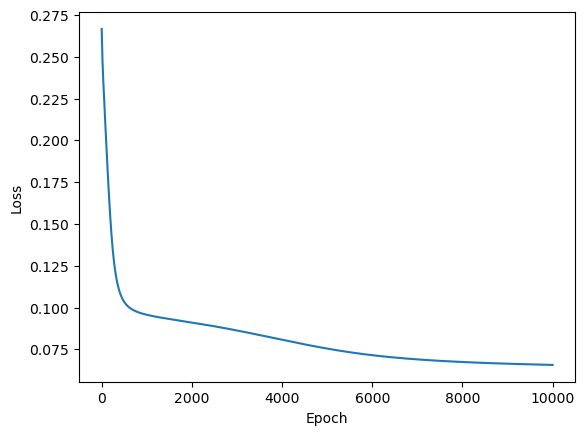

In [50]:
# Plot the learning curve
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [51]:
# Print the resulting input and output values
print('Input:', inputs)
print('Output:', model(inputs))

Input: tensor([[0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 1., 1., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 1., 0., 0., 0.],
        [0., 0., 1., 1., 0., 0., 0., 0.],
        [0., 0., 1., 1., 1., 0., 0., 0.]])
Output: tensor([[1.1860e-01, 9.8070e-02, 1.1442e-01, 2.5796e-01, 1.7320e-01, 9.4170e-02,
         1.0095e-01, 1.1340e-01],
        [9.7037e-03, 1.2854e-02, 3.5865e-01, 4.1981e-01, 3.8416e-01, 1.4131e-02,
         1.2233e-02, 1.0840e-02],
        [2.2185e-02, 2.5063e-02, 2.5907e-01, 3.6390e-01, 3.0542e-01, 2.6336e-02,
         2.4488e-02, 2.3520e-02],
        [1.6495e-03, 3.0692e-03, 6.0214e-01, 5.4353e-01, 5.6698e-01, 3.7156e-03,
         2.7611e-03, 2.0593e-03],
        [4.1897e-03, 6.5218e-03, 4.7293e-01, 4.7827e-01, 4.7009e-01, 7.5056e-03,
         6.0429e-03, 4.9341e-03],
        [3.0630e-04, 7.8554e-04, 7.9524e-01, 6.5613e-01, 7.2540e-01, 1.04

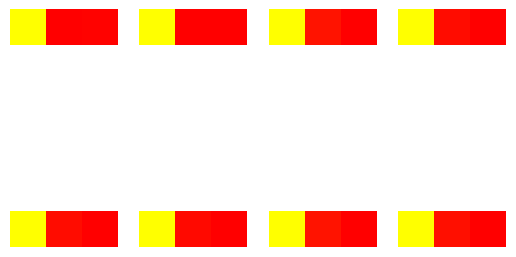

In [52]:
# Visualize the states of the hidden neurons
hidden_states = model.hidden(inputs).detach()
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(hidden_states[i].reshape(1, 3), cmap='autumn')
    plt.axis('off')
plt.show()

In [53]:
print(hidden_states) 

tensor([[ 8.3764e-01, -3.0226e-01, -2.9183e-01],
        [ 2.5298e+00, -1.3581e-01, -1.4041e-01],
        [ 1.9875e+00, -2.5817e-01, -4.3962e-01],
        [ 3.6797e+00, -9.1709e-02, -2.8820e-01],
        [ 3.0760e+00, -2.1121e-01, -3.7734e-01],
        [ 4.7682e+00, -4.4755e-02, -2.2592e-01],
        [ 4.2258e+00, -1.6711e-01, -5.2513e-01],
        [ 5.9180e+00, -6.5720e-04, -3.7371e-01]])


The explainability of hidden neurons is largely unknown. matplotlib visualization does not really explain anything either. That's why enither the numbers nor the plot above, explain anything what is going on here. It must be noted that the states of the hidden neurons differ from each other, which can be seen in the numbers. It is not seen on the plot. The same issue may be in the 8-2-8 case

8-2-8 case

In [59]:
# Define the input and target tensors for the 8-3-8 task
inputs = torch.tensor([[0, 0, 0, 0, 0, 0, 0, 0],
                       [0, 0, 0, 0, 1, 0, 0, 0],
                       [0, 0, 0, 1, 0, 0, 0, 0],
                       [0, 0, 0, 1, 1, 0, 0, 0],
                       [0, 0, 1, 0, 0, 0, 0, 0],
                       [0, 0, 1, 0, 1, 0, 0, 0],
                       [0, 0, 1, 1, 0, 0, 0, 0],
                       [0, 0, 1, 1, 1, 0, 0, 0]], dtype=torch.float32)
targets = inputs.clone()
# Create and train the model
model = MLP(8, 2, 8)
model, losses = train(model, inputs, targets, num_epochs=10000, learning_rate=0.1)
predictions = model.predict(inputs)

Epoch 100/10000, Loss: 0.22917883098125458
Epoch 200/10000, Loss: 0.19498413801193237
Epoch 300/10000, Loss: 0.17070381343364716
Epoch 400/10000, Loss: 0.15382681787014008
Epoch 500/10000, Loss: 0.1419743448495865
Epoch 600/10000, Loss: 0.13344018161296844
Epoch 700/10000, Loss: 0.12711380422115326
Epoch 800/10000, Loss: 0.12236571311950684
Epoch 900/10000, Loss: 0.11868178844451904
Epoch 1000/10000, Loss: 0.11576002091169357
Epoch 1100/10000, Loss: 0.11339810490608215
Epoch 1200/10000, Loss: 0.11145669221878052
Epoch 1300/10000, Loss: 0.10983757674694061
Epoch 1400/10000, Loss: 0.1084699034690857
Epoch 1500/10000, Loss: 0.10730158537626266
Epoch 1600/10000, Loss: 0.10629357397556305
Epoch 1700/10000, Loss: 0.10541611164808273
Epoch 1800/10000, Loss: 0.104646235704422
Epoch 1900/10000, Loss: 0.1039658933877945
Epoch 2000/10000, Loss: 0.10336081683635712
Epoch 2100/10000, Loss: 0.10281950235366821
Epoch 2200/10000, Loss: 0.1023326888680458
Epoch 2300/10000, Loss: 0.10189274698495865
Epo

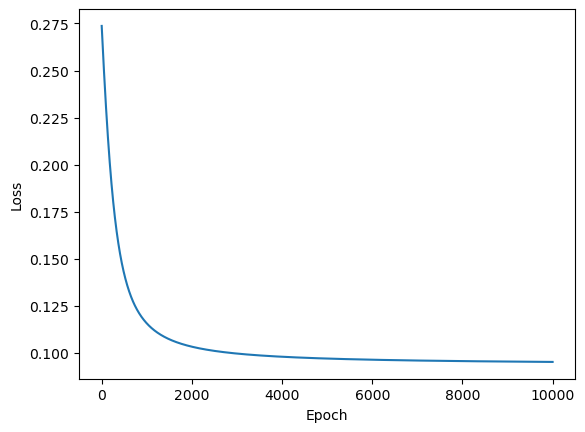

In [60]:
# Plot the learning curve
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

It is harded to train 8-2-8 model (using same hyperparameters as in 8-3-8 model above). The achieved loss is higher. That is because there are fewer neurons in this model, thus in the same circumstances as before, it may underfit. 

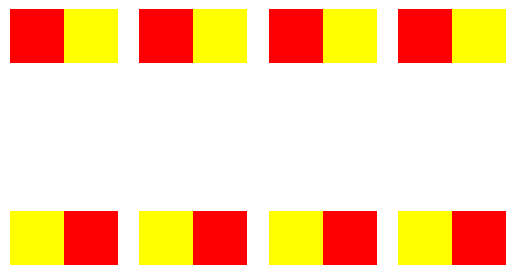

In [61]:
# Visualize the states of the hidden neurons
hidden_states = model.hidden(inputs).detach()
for i in range(8):
    plt.subplot(2, 4, i+1)
    plt.imshow(hidden_states[i].reshape(1, 2), cmap='autumn')
    plt.axis('off')
plt.show()

In [62]:
print(hidden_states)

tensor([[-3.3377e-01, -2.1955e-01],
        [-1.5789e-01, -1.4417e-01],
        [-5.9266e-01, -3.3217e-01],
        [-4.1678e-01, -2.5679e-01],
        [-1.7606e-01, -4.4357e-01],
        [-1.8376e-04, -3.6819e-01],
        [-4.3495e-01, -5.5618e-01],
        [-2.5907e-01, -4.8081e-01]])


50 - 2 - 50 case

In [63]:
# Define the input and target tensors for the 50-2-50 task
inputs = torch.eye(50) # Eye is basically an identity matrix, which fulfills the task pre-requirements. 
targets = inputs.clone()

# Create and train the model
model = MLP(50, 2, 50)
model, losses = train(model, inputs, targets, num_epochs=10000, learning_rate=0.1)
predictions = model.predict(inputs)

Epoch 100/10000, Loss: 0.2539485991001129
Epoch 200/10000, Loss: 0.2431824654340744
Epoch 300/10000, Loss: 0.23285658657550812
Epoch 400/10000, Loss: 0.2229740470647812
Epoch 500/10000, Loss: 0.21353261172771454
Epoch 600/10000, Loss: 0.2045290172100067
Epoch 700/10000, Loss: 0.19596007466316223
Epoch 800/10000, Loss: 0.1878179907798767
Epoch 900/10000, Loss: 0.18009358644485474
Epoch 1000/10000, Loss: 0.1727755069732666
Epoch 1100/10000, Loss: 0.16584964096546173
Epoch 1200/10000, Loss: 0.15930134057998657
Epoch 1300/10000, Loss: 0.153114914894104
Epoch 1400/10000, Loss: 0.14727409183979034
Epoch 1500/10000, Loss: 0.14176201820373535
Epoch 1600/10000, Loss: 0.13656187057495117
Epoch 1700/10000, Loss: 0.13165678083896637
Epoch 1800/10000, Loss: 0.12703026831150055
Epoch 1900/10000, Loss: 0.12266623228788376
Epoch 2000/10000, Loss: 0.11854909360408783
Epoch 2100/10000, Loss: 0.11466391384601593
Epoch 2200/10000, Loss: 0.11099636554718018
Epoch 2300/10000, Loss: 0.10753283649682999
Epoch

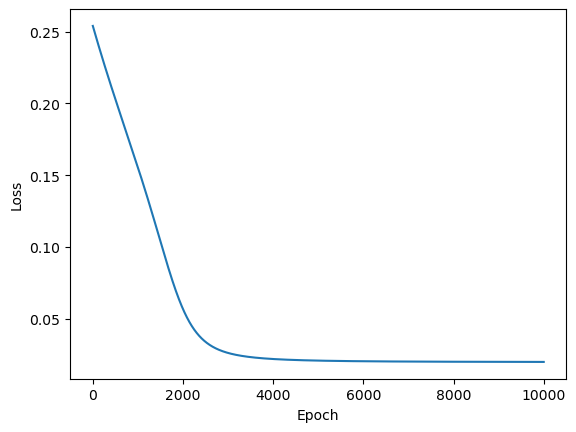

In [14]:
# Plot the learning curve
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

The achieved loss is lower as expected. The amount of model parameters is higher, thus it is easier to train the model for this simple problem. Because of the higher number of parameters, model may as well be overfitted to the problem.
There's also no use in visualizing the hidden states, as there's a lot of them and if the previous hidden states in 8-2-8 and 8-3-8 scenarios were hard to explain, then in 50-2-50 scenario, it's inpossible.